09-2 성별에 따른 월급 차이

1단계 변수 검토 전처리
- 나이
- 월급

2단계 변수 간 관계분석
- 나이에 따른 월급 평균표 만들기
- 그래프 만들기

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

raw_welfare = pd.read_spss('data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
welfare = welfare.rename(
    columns={'h14_g3': 'sex',
             'h14_g4': 'birth',
             'p1402_8aq1': 'income'
             }
)
welfare['birth'].dtypes

dtype('float64')

In [7]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<AxesSubplot:xlabel='birth', ylabel='Count'>

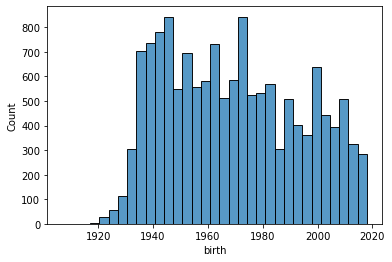

In [16]:
sns.histplot(data = welfare, x = 'birth')

In [17]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [18]:
welfare['birth'].isna().sum()

0

In [19]:
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])
welfare['birth'].isna().sum()

0

나이 변수 만들기

In [20]:
welfare = welfare.assign(age = 2019 - welfare['birth']+1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

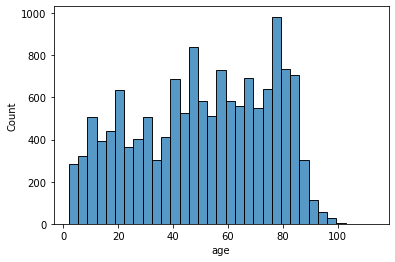

In [21]:
sns.histplot(data=welfare, x='age')

나이별 월급 평균표 만들기

In [22]:
age_income = welfare.dropna(subset=['income']).groupby('age').agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<AxesSubplot:xlabel='age', ylabel='mean_income'>

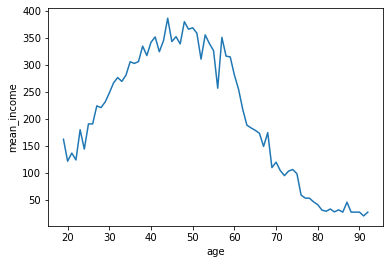

In [23]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')